# Veri Gorsellestirme

* # Veri Setine Ilk Bakis

### Gorsellestirme Frameworkleri

* Matplotlib
* Pandas
* Seaborn
* ggplot
* Plot.ly
* Bokeh

## Veriye Ilk Bakis

* Veriye ilk bakis, aslinda veri setinin teorik olarak nasil olustugunun sorgulanmasidir.
* Ilk asamada sorulacak sorular veri setinin hikayesi nedir, nasil olusmustur, neye gore olusturulmustur gibi sorulardir.
* Ikinci asamada ise veri setinin yapisal ozelliklerine goz atmamiz gerekir.
* Veri setini tanimladiktan sonra copy metodu ile bir yedegini almak en guvenli adim olacaktir.
* Yapisal ozelliklere goz atarken degisken tiplerinde eger **object** olarak gorulen degiskenler versa bunlari **categoric** degiskenlere cevirmek yararli olacaktir.

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df = planets.copy()
import pandas as pd
df.method = pd.Categorical(planets.method)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 42.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


Veri setinin betimlenmesinde describe metodu cok ise yarar. Describe metodu kullanildiginda hesaplamalara kategorik degiskenleri ve null degiskenleri almaz. Onlari da almak icin include="all" seklinde parametre vermek gerekir.

### Eksik Degerleri Gozlemlemek

* Veri seti icerisinde eksik olan bir deger bulunmakta mi bunu kontrol ederiz.

In [6]:
df.isnull().values.any()

True

* Donus degeri True oldugu icin veri seti icerisinde eksik degerler oldugunu anlariz.
* Bu eksik degerlerin hangi degiskenler uzerinde oldugunu gormek icin asagidaki adimi uygulariz.

In [7]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

* Belirli bir degiskenin eksik degerlerini sifirlar ile doldurmak istersek asagidaki metodu kullaniliriz.

In [11]:
df["orbital_period"].fillna(0,inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

* Eger belirli bir degiskenin eksik degerleri yerine ortalamasini yazmak istersek asagidaki metodu kullaniriz.

In [12]:
df["mass"].fillna(df["mass"].mean(),inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

### Kategorik Degiskenleri Gozlemlemek

* Sadece kategorik olan degerleri daha iyi gozlemleyebilmek adina bir df icerisine yolladik.

In [17]:
df = planets.copy()

cat_df = df.select_dtypes("object")
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


* Kategorik degerler icerisinde neler oldugunu gozlemledik.

In [18]:
cat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [19]:
cat_df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [20]:
cat_df.value_counts().count()

10

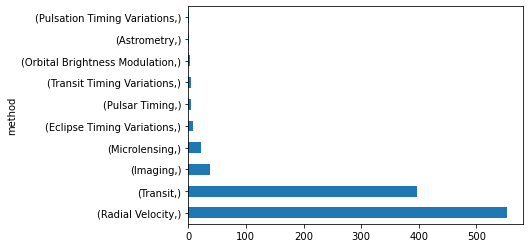

In [22]:
cat_df.value_counts().plot.barh();

* Buradaki gozlemleri Surekli Degiskenler icin describe metoduyla yapmistik.

## Surekli Degiskenleri Gozlemlemek

Surekli degiskenlerimizin tipleri genellikle **float64 ve int64** olarak bulunmaktadir. Bu sebeple select_dtype fonksiyonuyla surekli degiskenlerimizi secme sansina sahip olabiliyoruz.

In [4]:
import seaborn as sns
df = sns.load_dataset("planets")
df_num = df.select_dtypes(include = ["float64", "int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


Surekli degiskenlerin betimsel degerlerini yine describe fonksiyonu ile belirleyebiliriz.

In [5]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


# Dagilim Grafikleri

* ## Sutun Grafik (Bar Plot)

Kategorik değişkenleri görselleştirmek için kullanılan sütun grafiği burada ele alınıyor.

In [10]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* Veriler her bir elmas icin verilen degerlerdir.
    * cut , color ve clarity kategorik
    * diger degiskenler surekli degiskenlerdir.
* Kategorik degiskenlerin hepsi ordinal seklindedir. Fakat veri setinde nominal seklinde tanimlanmistir. Bu sebeple ordinal olarak belirmemiz ve siralamasini parametre olarak vermemiz gerekmektedir.

In [13]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

* Nominal kategorik degiskenleri ordinale cevirebilmek icin oncelikle
    * from pandas.api.types import CategoricalDtype kutuphanesini dahil etmemiz gerekiyor.
    * Daha sonrasinda degiskenin kendisine astype uzerinden degistirilmis halini esitleyerek ordinale ceviriyoruz.
    * Burada categories parametresi olarak asagidan yukariya siralanmis olarak veriyoruz.
    * Ordinal oldugu icin ordered parametresine True diyoruz

In [14]:
from pandas.api.types import CategoricalDtype
df.cut = df.cut.astype(CategoricalDtype(categories=["Fair","Good","Very Good","Premium","Ideal"],ordered=True))

In [15]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [16]:
df.color = df.color.astype(CategoricalDtype(categories=['J','I','H','G','F','E','D'] ,ordered=True))
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [17]:
df.clarity = df.clarity.astype(CategoricalDtype(categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'] ,ordered=True))
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

* Sutun grafiklerini hem pandas hem de seaborn uzerinden gerceklestiriyoruz.

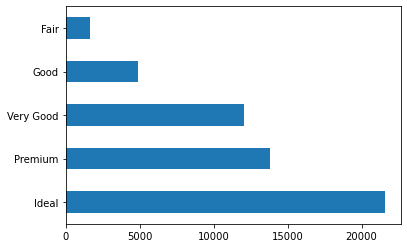

In [18]:
df.cut.value_counts().plot.barh();

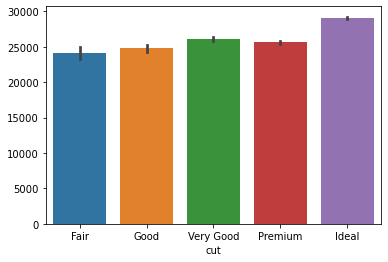

In [19]:
sns.barplot(x="cut",y=df.cut.index,data=df);

### Caprazlamalar

* Caprazlama, veri seti icerisinde yer alan degiskenlerin birlikte degerlendirilmesidir.
* Burada cut degiskeninin price degiskeni ile olan caprazlamasini gozlemleyecegiz.

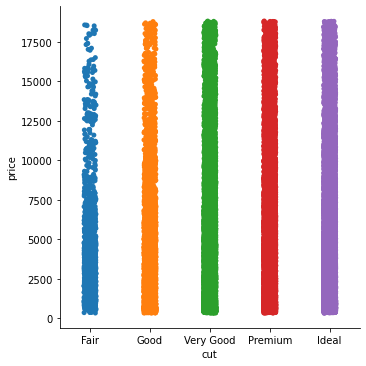

In [20]:
sns.catplot(x="cut",y="price",data=df);

* Bu asamada caprazlamamizin icerisinde ucuncu bir degisken daha ekliyoruz.
* color degiskeni her cut degiskeninin degeri icin colorlarin pricelarini gosteriyor olacaktir.

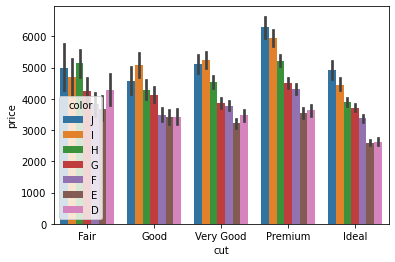

In [21]:
sns.barplot(x="cut",y="price",hue="color",data=df);

* Bu tablodan cikarilmasi gereken teknik sonuc;
    * y ekseninde herhangi bir bozulma gerceklesmiyor. cut ve color degiskenlerinin groupby gerceklestirilmesi sonucu price degiskeninin ortalama degerleriyle temsili bir deger olusturulmustur.
    * Renkli barlar degerleri temsil ederken uclarindaki siyah barlar ise standart sapmayi(standart hata) temsil eder.

In [22]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

* ## Histogram ve Yogunluk Grafikleri

* Sürekli değişkenleri görselleştirmek için kullanılan histogram ve yoğunluk grafikleri burada ele alınıyor.

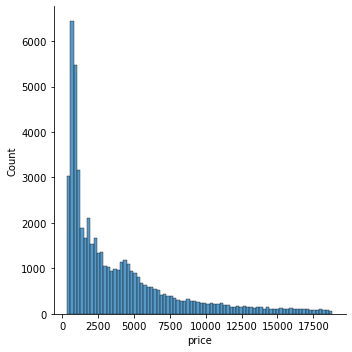

In [23]:
sns.displot(df.price);

* Olasılık yoğunluk grafiğini **kdeplot** metodu ile gerçekleştiririz. Eğer grafiğin alt tarafını doldurmak istersek shade parametresini True olarak atarız.

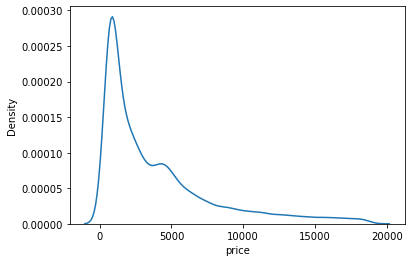

In [24]:
sns.kdeplot(df.price);

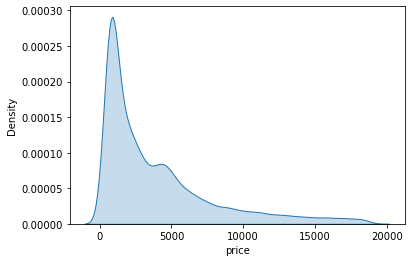

In [25]:
sns.kdeplot(df.price, shade=True);

## Çaprazlamalar

* Bağımlı değişken olan price değişkeni için bağımsız olan farklı değişkenlerin dağılım üzerindeki etkisini çaprazlamalar yaparak gözlemleyeceğiz.
* FacetGrid, map fonksiyonu ile birlikte kullanılarak bir değişken üzerine belirli bir grafiği uygulayarak farklı değişkenlerin ilişkilerini gözlemlemek için kullanılır.
* Aşağıdaki grafikte **cut** değişkeninin içerisinde bulunan değerlerin price değişkeni üzerindeki dağılımlarını rahatça gözlemleyebilmekteyiz.

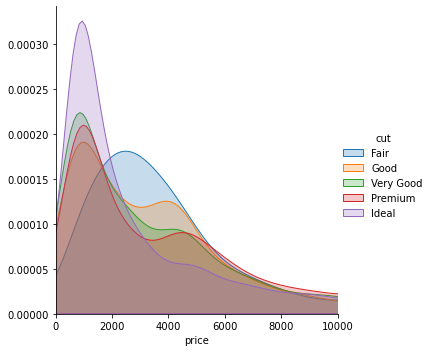

In [35]:
(sns.FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0,10000))
     .map(sns.kdeplot,"price",shade=True)
     .add_legend()
);

* Bu grafikte ise iki farklı bağımsız değişkenin, bağımlı değişken olan price üzerindeki dağılımlarını gözlemlemekteyiz.

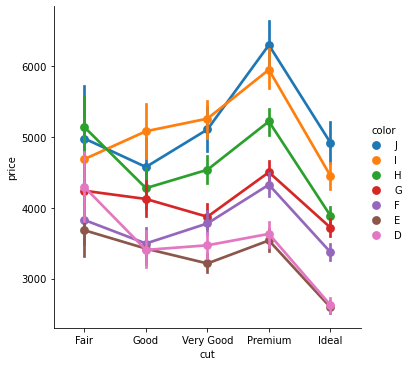

In [37]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

* ## Boxplot

* Sürekli değişkenleri görselleştirmek için kullanılan boxplot burada ele alınıyor.
* Boxplot özellikle aykırı değerlerin tespitinde de bize yardımcı olur.

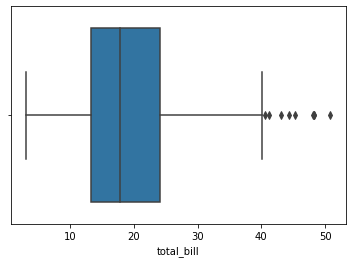

In [2]:
import seaborn as sns
df = sns.load_dataset("tips")
sns.boxplot(x=df.total_bill);

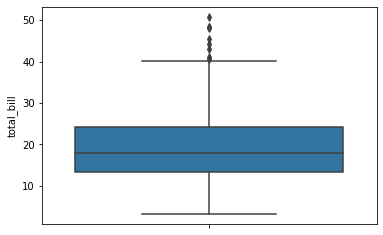

In [3]:
sns.boxplot(y=df.total_bill,orient="v");

## Çaprazlamalar

* İnsan davranışlarına yakın bir veri seti elimizde bulunduğundan, katma değeri yüksek sorular türetmek bizler için daha kolay olacaktır.

* Hangi günler daha fazla kazanıyoruz sorusuna vereceğimiz cevabı aşağıdaki boxplottan yorumlayarak bulaibliriz.

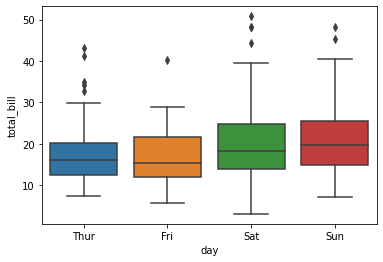

In [4]:
sns.boxplot(x=df.day, y=df.total_bill);

* Sabah mı yoksa akşam mı daha çok kazanıyoruz?

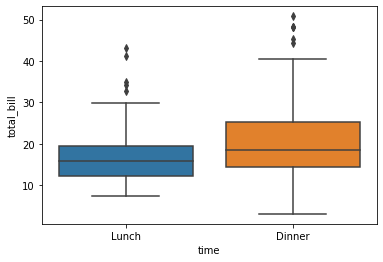

In [6]:
sns.boxplot(x=df.time,y=df.total_bill);

* Mekana gelen kişi sayısı ile kazandığımız tutar arasındaki ilişki nedir?

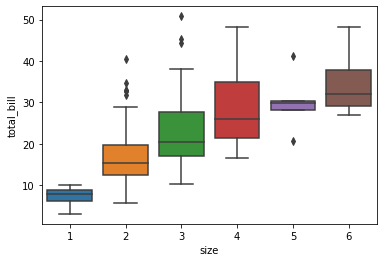

In [13]:
sns.boxplot(x="size",y="total_bill",data=df);

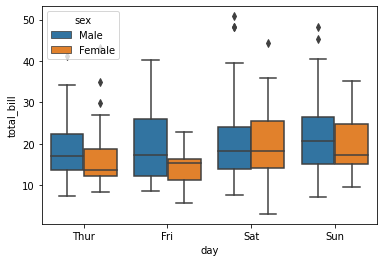

In [37]:
sns.boxplot(x=df.day,y=df.total_bill,hue=df.sex);

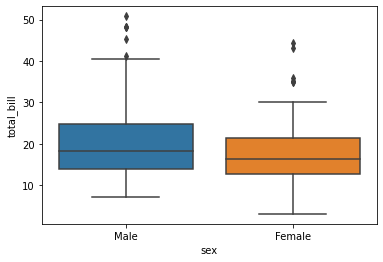

In [44]:
sns.boxplot(x=df.sex,y=df.total_bill);

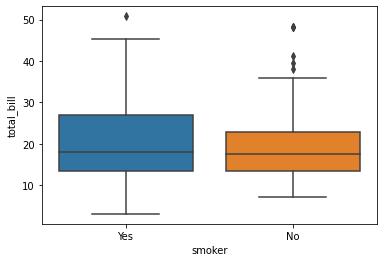

In [43]:
sns.boxplot(x=df.smoker,y=df.total_bill);

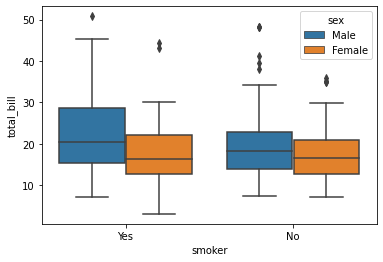

In [42]:
sns.boxplot(x=df.smoker,y=df.total_bill,hue=df.sex);

* ## Violin Grafik

* Sürekli değişkenleri görselleştirmek için kullanılan violin grafik burada ele alınıyor.
* Boxplot ve yoğunluk grafiğinin birleştirilmesi gibi düşünülebilir.

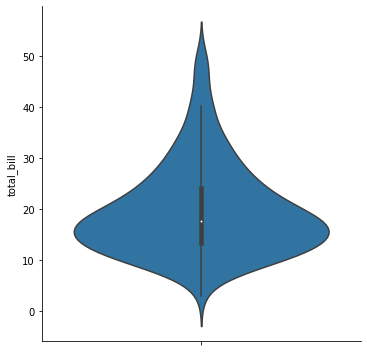

In [47]:
sns.catplot(y="total_bill",kind="violin",data=df);

## Çaprazlamalar

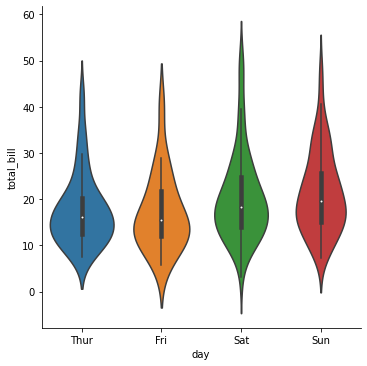

In [48]:
sns.catplot(x="day", y="total_bill",kind="violin",data=df);

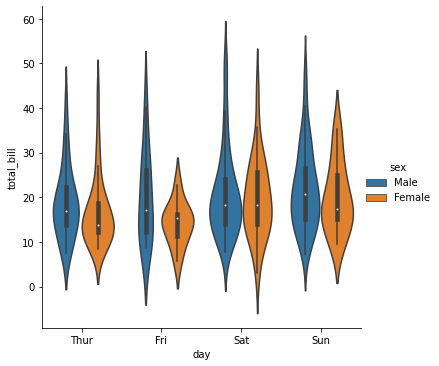

In [51]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin",data=df);

# Korelasyon Grafikleri

* Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir. Genel istatistiksel kullanımda korelasyon, bağımsızlık durumundan ne kadar uzaklaşıldığını gösterir.
* Sürekli değişkenlerin arasındaki ilişkiyi görselleştirmek için kullanılan korelasyon grafikleri burada inceleniyor.
* Bu grafiklerden en çok kullanılanı **scatterplot** yani saçılım grafiğidir.

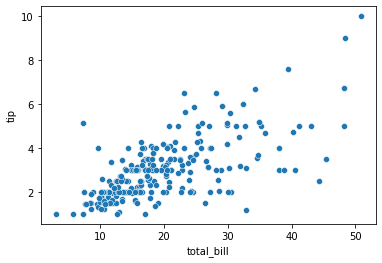

In [52]:
# Basit bir scatterplot oluşturulması
sns.scatterplot(x=df.total_bill,y=df.tip);

## Çaprazlamalar

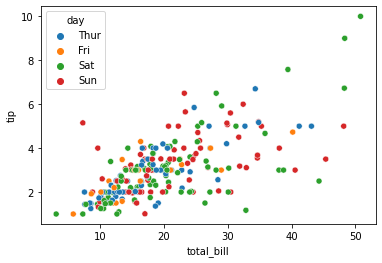

In [53]:
sns.scatterplot(x=df.total_bill,y=df.tip,hue=df.day);

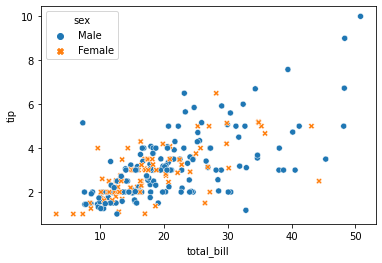

In [55]:
sns.scatterplot(x=df.total_bill,y=df.tip, hue=df.sex,style=df.sex);

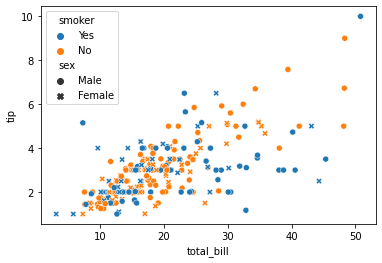

In [56]:
sns.scatterplot(x=df.total_bill,y=df.tip, hue=df.smoker,style=df.sex);

* Sürekli değişkenlerin scattera eklenmesi işlemini **size** parametresi ile gerçekleştiriyoruz.

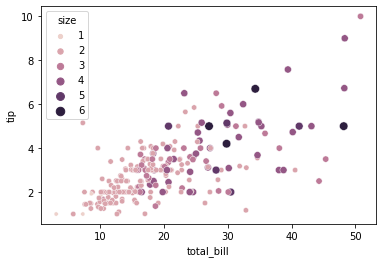

In [60]:
sns.scatterplot(x="total_bill",y="tip", hue="size",size="size",data=df);

* ## Doğrusal İlişkinin Gösterilmesi

* Scatter grafiğini yorumlar iken  bir de doğrusal vektör yardımıyla yorumumuzu çeşitlendirmeye çalışacağız.
* Bunun için Linear Model olarak lmplot fonksiyonunu kullanacağız.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("tips")

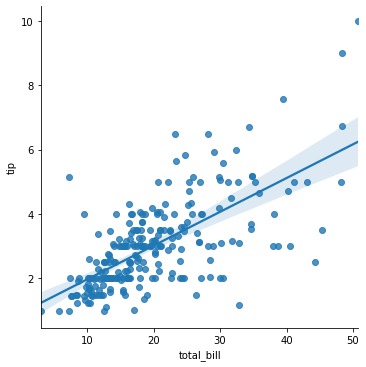

In [3]:
sns.lmplot(x="total_bill",y="tip",data=df);

* Bu doğrusal ilişkilerin yorumlanması makine öğrenmesi algoritmalarının veriden nasıl öğrendiğini ve nasıl sonuçlar çıkardığını farkına varabiliriz.
* Aşağıdaki grafikte kırılmanın eğimde yarattığı değişikliği görebiliyoruz.

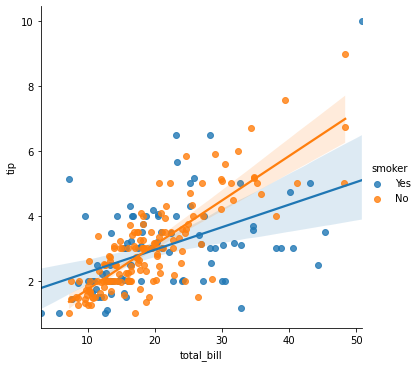

In [5]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

* Grafiğe satır ve sütün bazında yeni kırılmalar kelemek için row ve col parametrelerini kullanırız.

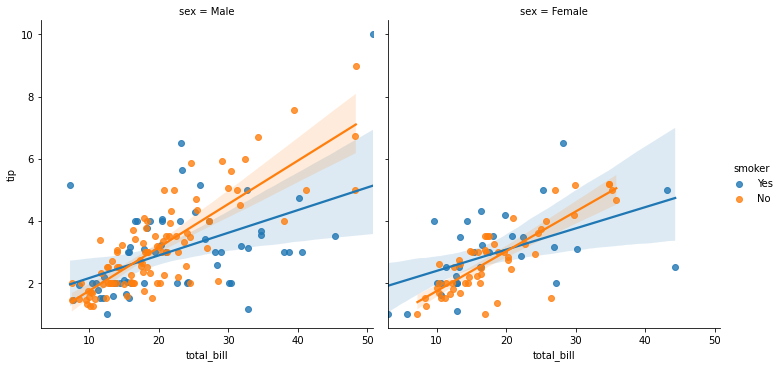

In [7]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="sex",data=df);

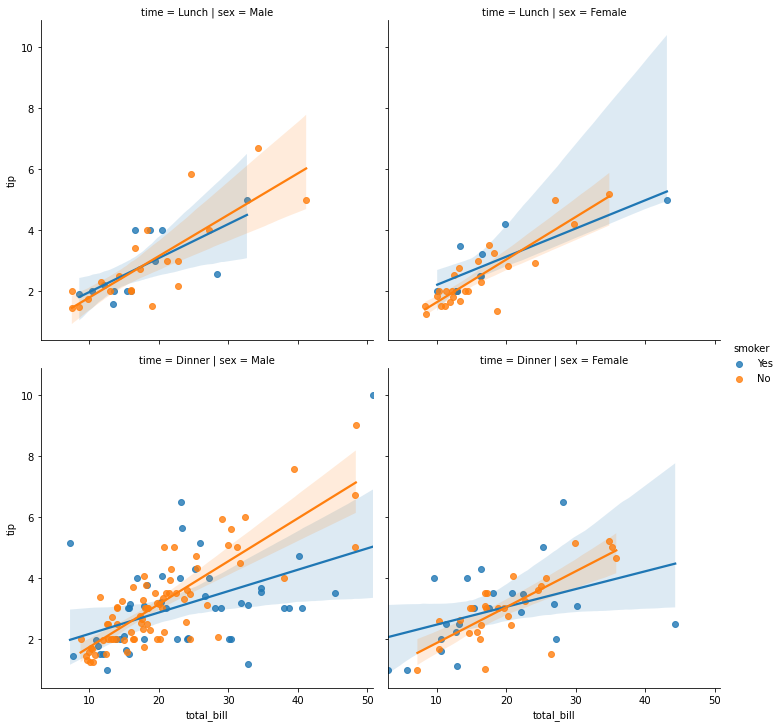

In [9]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="sex",row="time",data=df);

* ## Scatterplot Matrix

* Scatterplot grafiğinin tüm değişkenlerin birbiri üzerine uygulanmış şeklinde gösterilmesine scatter matrixtir.
* **pairplot** fonksiyonu ile gerçekleştirilir.
* Eksendeki değerler o değişkenin dağılım grafiğini göstermektedir. Kesişimler ise değişkenlerin scatter grafiğini belirtmektedir.

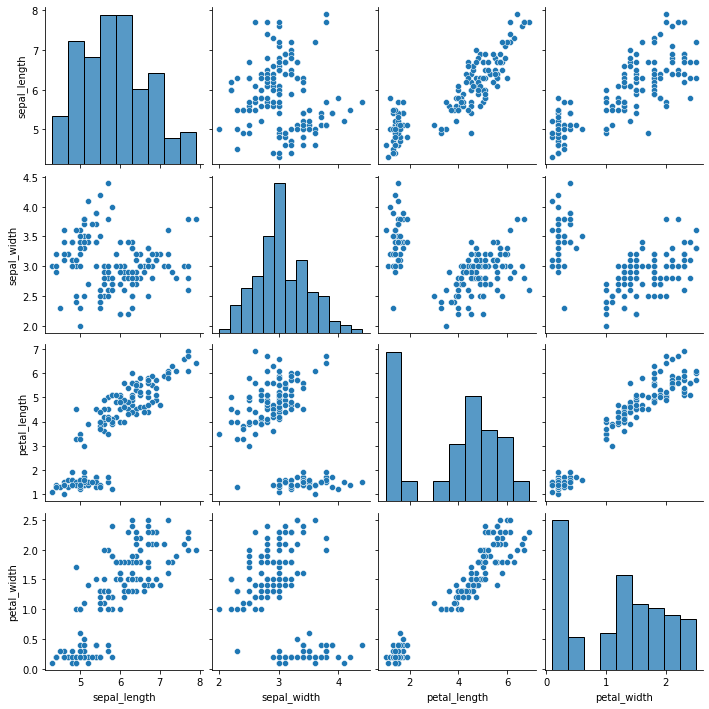

In [10]:
df = sns.load_dataset("iris")
sns.pairplot(df);

* Scatterplot grafiğinde 
    * Eğer oluşturulmuş grafik bir toz bulutu şeklinde veya yapısal bir formu yoksa bu o iki değişken arasında bir ilişki olmadığı anlamına gelir.
    * Eğer oluşturulan grafik üzerinde gözlem noktaları birbirlerinden farklı köşelerde kümelenmiş ise bu durum çaprazlama durumundan kaynaklanan farklı alt grupların var olduğu anlamına gelir.

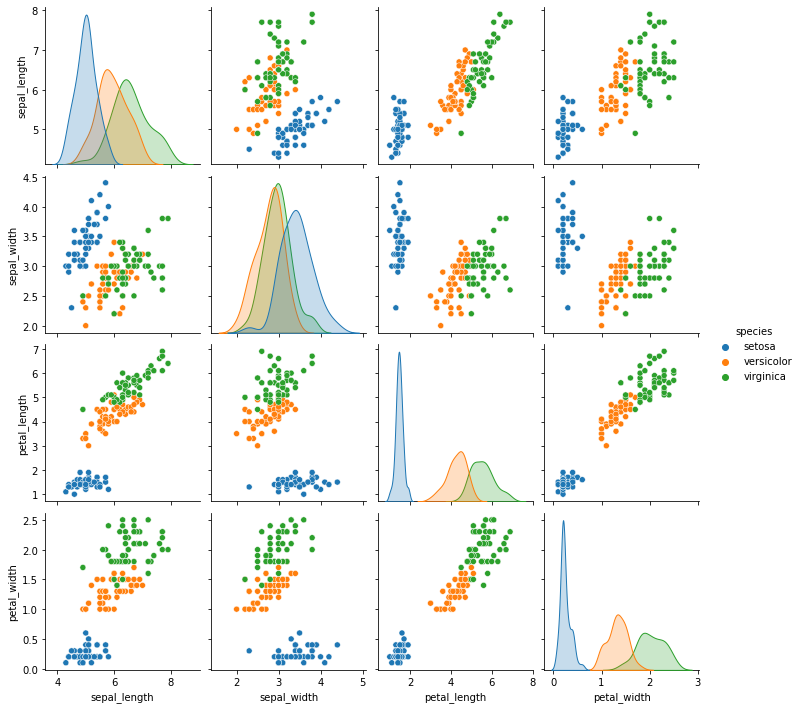

In [12]:
sns.pairplot(df, hue="species");

* Scatter matrisinde doğrusal grafiğin çizilmesi için kind parametresine reg değeri verilmesi gerekir.

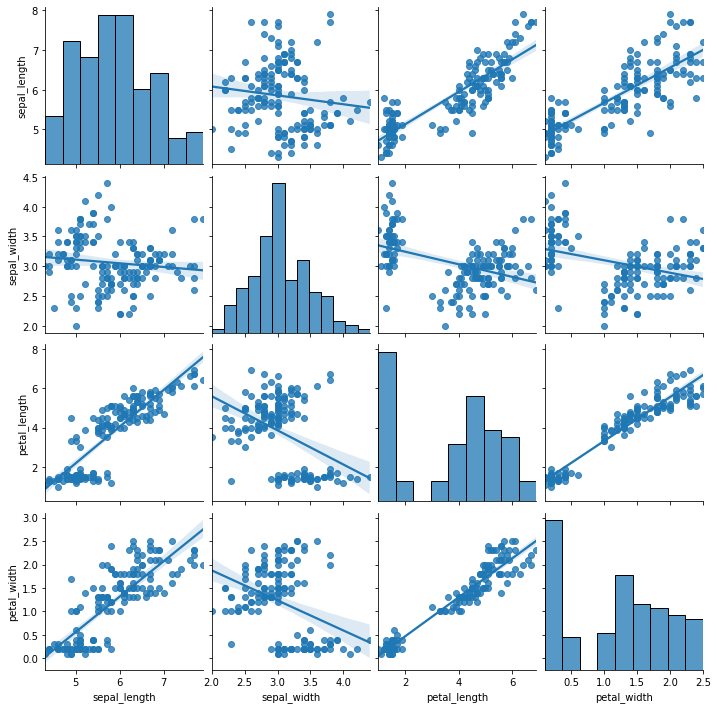

In [13]:
sns.pairplot(df,kind="reg");

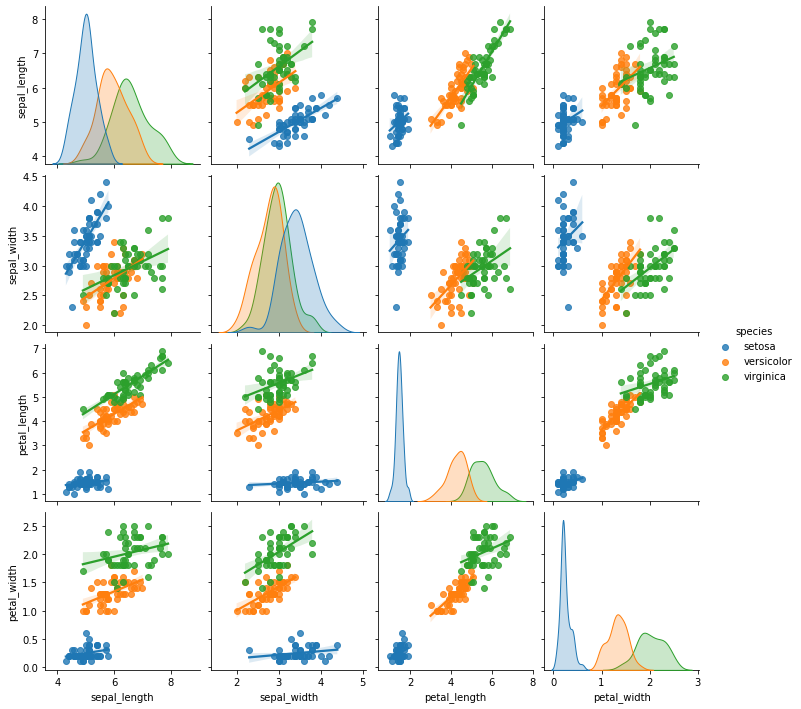

In [14]:
sns.pairplot(df,kind="reg",hue="species");

# Heat Map

* Heat Map, elimizdeki değişkenleri yapısal anlamda daha geniş bir perspektifte görmek istediğimizde kullandığımız bir grafiktir.
* Uzun vadeli verilerde (içerisinde yıl ve ay gidi değişkenler olduğunda) bu dönemlere karşılık gözlemlenebilecek sayısal değerler olduğunda kullanılabilir.
* Daha büyük ölçekli belirli periyodlarla tekrar eden olayları görmek istediğimizde kullanılır.
* Sadece zamansal bağlamda değil elimizde çok sınıflı bir kategorik değişken olup bunu bir sayısal değişkene göre görselleştirmek gerekiyorsa kullanılır.
* Ayrıca Pattern Detection problemlerinde kullanılır.

In [17]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


* Görüldüğü üzere ypaılan tanıma uyan bir veri seti elimizde bulunmaktadır.
* Fakat bu veri setini heatmap fonksiyonuna verdiğimizde bize hata döndürür. Bunun sebebi verisetinin düzensiz olmasıdır.
* Düzenleyi pivot tablo şekline getirerek yapabiliriz, böylece heatmap oluşturulabilir.

In [18]:
pivot = df.pivot("month","year","passengers")
pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


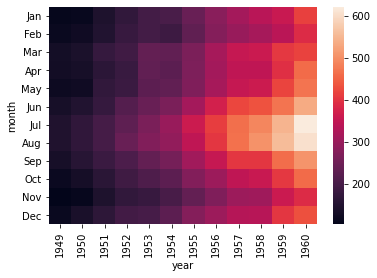

In [19]:
sns.heatmap(pivot);

Heatmap içerisine sayısal değerlerini eklemek istersek;

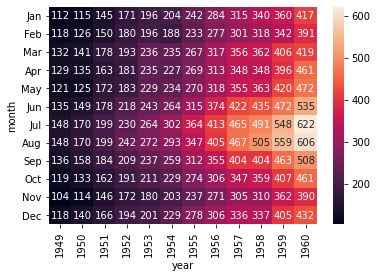

In [21]:
sns.heatmap(pivot, annot=True,fmt="d");

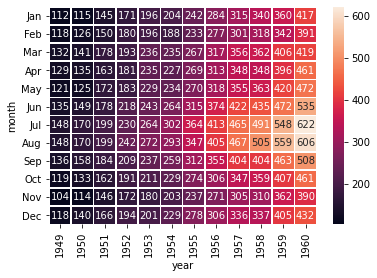

In [22]:
sns.heatmap(pivot, annot=True,fmt="d",linewidths=.5);

# Line Plot

* Zamana bağlı olan verisetlerinde ve IoT gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanılan grafik görselleştirme tekniğidir.
* Aşağıdaki veri seti beyne yerleştirilen bir cihazdan gelen sinyallerin tutulduğu bir kayıttır.
    * subject denekleri belirtir
    * timepoint zaman aralığını belirtir
    * event olayı belirtir
    * region bölgeyi belirtir
    * signal gelen sinyali belirtir.

In [23]:
df = sns.load_dataset("fmri")
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [26]:
# Her bir timepoint için bir signal oluşturulmuş.
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

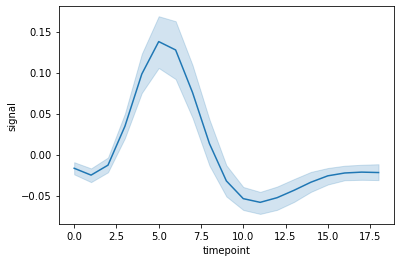

In [30]:
sns.lineplot(x="timepoint",y="signal",data=df);

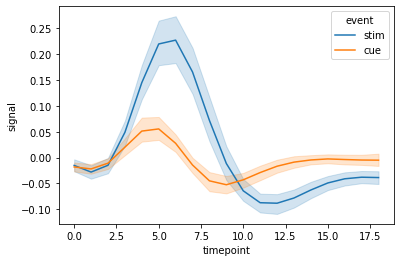

In [31]:
sns.lineplot(x="timepoint",y="signal", hue="event",data=df);

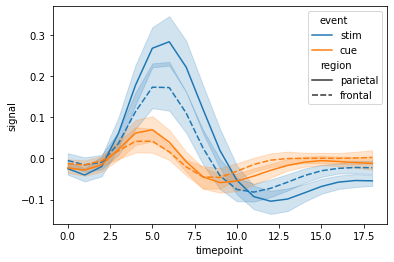

In [32]:
sns.lineplot(x="timepoint",y="signal", hue="event",style="region",data=df);

# Basit Zaman Serisi Grafiği

In [33]:
!pip install pandas_datareader

In [44]:
import pandas_datareader as pr
import pandas as pd
data = pr.get_data_yahoo("AAPL",start="2020-01-01", end="2021-03-09")
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385


* Zamana bağlı olan Date değişkeninin zamana bağlı olduğunu belirtmek için index özelliğini belirtmemiz gerekiyor. Bu işlemi kapanış değeri üzerine gerçekleştireceğiz.

In [46]:
close = data["Close"]
close.index = pd.DatetimeIndex(close.index)
close.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09'],
              dtype='datetime64[ns]', name='Date', length=298, freq=None)

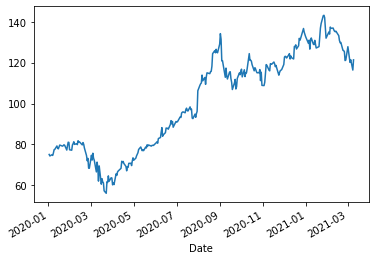

In [48]:
close.plot();